# Decision Tree. Classification. Part 1

---

## Trees based algorithms: Decision Tree, Random Forest, Gradient Boosting


Applied Mathematical Modeling in Banking

---

У даній частині навчального процесу потрібно побудувати маматичні моделі класифікації клієнтів на основі алгоритму дерева рішень та перевірити їх на тестовій вибірці.

# 1. Dataset description

**Abstract**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (`yes/no`) a term deposit (variable `y`).

**Attribute Information**


**Input variables: bank client data:**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|1|`age`||numeric||
|2|`job`|type of job|categorical|'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'|
|3|`marital`| marital status |categorical| 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed|
|4|`education`| |categorical| 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'|
|5|`default`| has credit in default? |categorical| 'no','yes','unknown'|
|6|`housing`| has housing loan? |categorical| 'no','yes','unknown'|
|7|`loan`| has personal loan? |categorical| 'no','yes','unknown'|


**Input variables: related with the last contact of the current campaign:**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|8| contact| contact communication type |categorical| 'cellular','telephone'|
|9 | month| last contact month of year |categorical| 'jan', 'feb', 'mar', ..., 'nov', 'dec'|
|10 | day_of_week| last contact day of the week |categorical|'mon','tue','wed','thu','fri'|
|11 | duration| last contact duration, in seconds |numeric||. 

`duration` - **_Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this 
input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model._**

**Input variables: other attributes:**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|12 | `campaign`| number of contacts performed during this campaign and for this client |numeric| includes last contact||
|13 | `pdays`|number of days that passed by after the client was last contacted from a previous campaign |numeric| 999 mean client was not previously contacted||
|14 | `previous`| number of contacts performed before this campaign and for this client |numeric||
|15 | `poutcome`| outcome of the previous marketing campaign |categorical| 'failure','nonexistent','success'|

**Input variables: social and economic context attributes**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|16 | `emp.var.rate`| employment variation rate - quarterly indicator |numeric||
|17 | `cons.price.idx`| consumer price index - monthly indicator |numeric||
|18 | `cons.conf.idx`| consumer confidence index - monthly indicator ||numeric||
|19 | `euribor3m`| euribor 3 month rate - daily indicator |numeric||
|20 | `nr.employed`|number of employees - quarterly indicator |numeric||

**Output variable (desired target):**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|21| `y` | has the client subscribed a term deposit? |binary| 'yes','no'|

Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing


---

# 2. Data load and preview

Для початку завантажимо дані у змінну `data`:

In [16]:
data <- read.csv("data/banking.csv", na.strings = c("", " ", "NA", "NULL"))
#use + unknown with na.strings if you want to play with missing
#data <- read.csv("data/banking.csv", na.strings = c("", " ", "NA", "NULL", "unknown"))

Переглянемо структуру вибірки даних з `str()`:

In [17]:
str(data)

'data.frame':	11162 obs. of  17 variables:
 $ age      : int  59 56 41 55 54 42 56 60 37 28 ...
 $ job      : chr  "admin." "admin." "technician" "services" ...
 $ marital  : chr  "married" "married" "married" "married" ...
 $ education: chr  "secondary" "secondary" "secondary" "secondary" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2343 45 1270 2476 184 0 830 545 1 5090 ...
 $ housing  : chr  "yes" "no" "yes" "yes" ...
 $ loan     : chr  "no" "no" "no" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 6 6 6 6 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  1042 1467 1389 579 673 562 1201 1030 608 1297 ...
 $ campaign : int  1 1 1 1 2 2 1 1 1 3 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ deposit  : chr  "yes" "yes" "yes" "yes" ...


Переглянемо вигляд перших рядків даних з `head()`:

In [18]:
head(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


Описова статистика факторів:

In [19]:
summary(data)

      age            job              marital           education        
 Min.   :18.00   Length:11162       Length:11162       Length:11162      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :41.23                                                           
 3rd Qu.:49.00                                                           
 Max.   :95.00                                                           
   default             balance        housing              loan          
 Length:11162       Min.   :-6847   Length:11162       Length:11162      
 Class :character   1st Qu.:  122   Class :character   Class :character  
 Mode  :character   Median :  550   Mode  :character   Mode  :character  
                    Mean   : 1529                                        
                    3rd Qu.: 1708                                        
                    Max.   :81204     

Перевіримо вибірку на наявність пропусків:

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,
11162,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


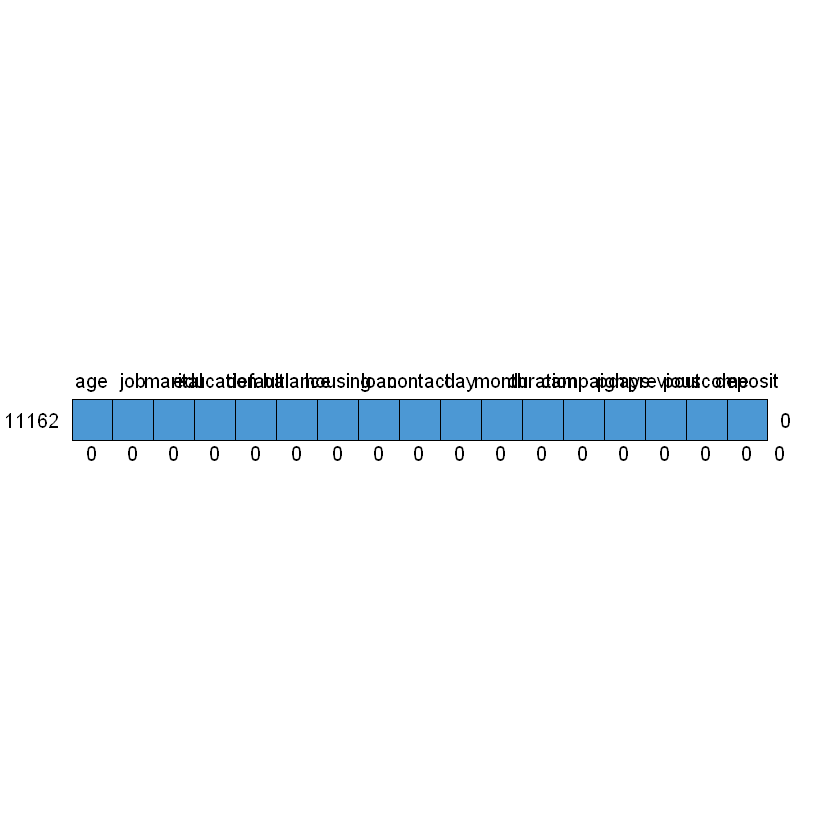

In [22]:
library(mice)
md.pattern(data) # OK

---

# 3. Data visualization

**Вік клієнта (age):**

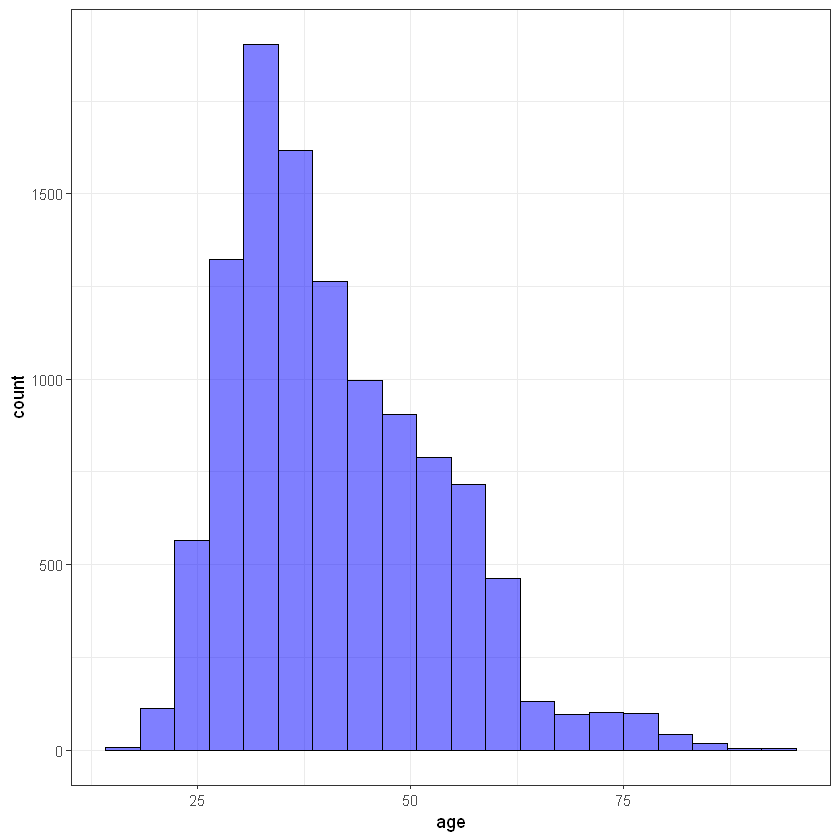

In [26]:
library(ggplot2)

ggplot(data, aes(age)) + 
    geom_histogram(bins = 20, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Робота клієнта (job):**

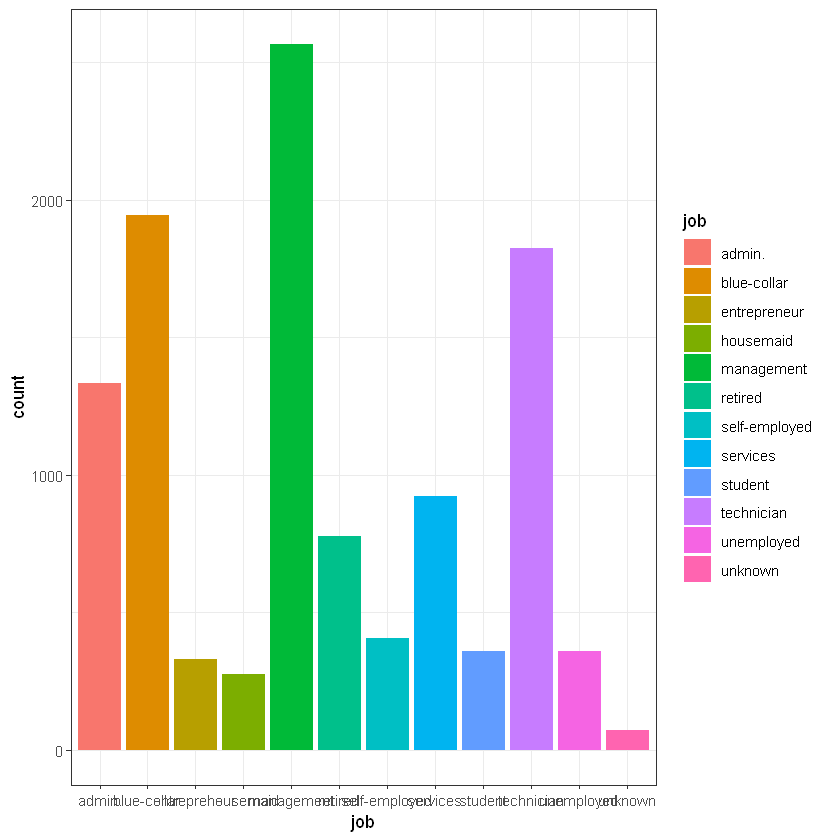

In [28]:
ggplot(data, aes(job)) + 
    geom_bar(aes(fill = job)) + 
    theme_bw()

In [36]:
library(gmodels)
CrossTable(data$job, data$deposit)
# more loyal to deposits are management, retired, student, unemployed ))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
              | data$deposit 
     data$job |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
       admin. |       703 |       631 |      1334 | 
              |     0.002 |     0.002 |           | 
              |     0.527 |     0.473 |     0.120 | 
              |     0.120 |     0.119 |           | 
              |     0.063 |     0.057 |           | 
--------------|-----------|-----------|-----------|
  blue-collar |      1236 |       708 |      1944 | 
              |    44.415 |    49.320 |           | 
              |     0.636 |     0.364 |     0.174 | 
              |     0.210 |     0.134 |           | 
              |     0.111 |     0.063 |           | 
--------------|---------

**Сімейний статус (marital):**

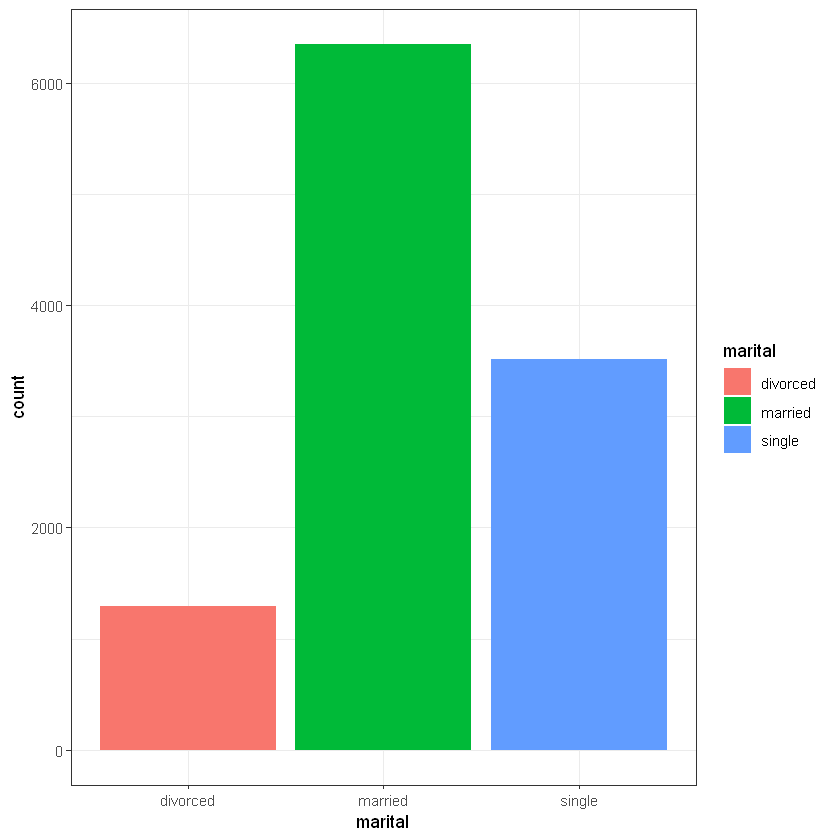

In [32]:
ggplot(data, aes(marital)) + 
    geom_bar(aes(fill = marital)) + 
    theme_bw()

In [35]:
CrossTable(data$marital, data$deposit)
# married are not very loyal to deposits
# but singles is more loyal


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$marital |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
    divorced |       671 |       622 |      1293 | 
             |     0.128 |     0.142 |           | 
             |     0.519 |     0.481 |     0.116 | 
             |     0.114 |     0.118 |           | 
             |     0.060 |     0.056 |           | 
-------------|-----------|-----------|-----------|
     married |      3596 |      2755 |      6351 | 
             |    19.361 |    21.499 |           | 
             |     0.566 |     0.434 |     0.569 | 
             |     0.612 |     0.521 |           | 
             |     0.322 |     0.247 |           | 
-------------|-----------|-----------|

**Освіта (education):**

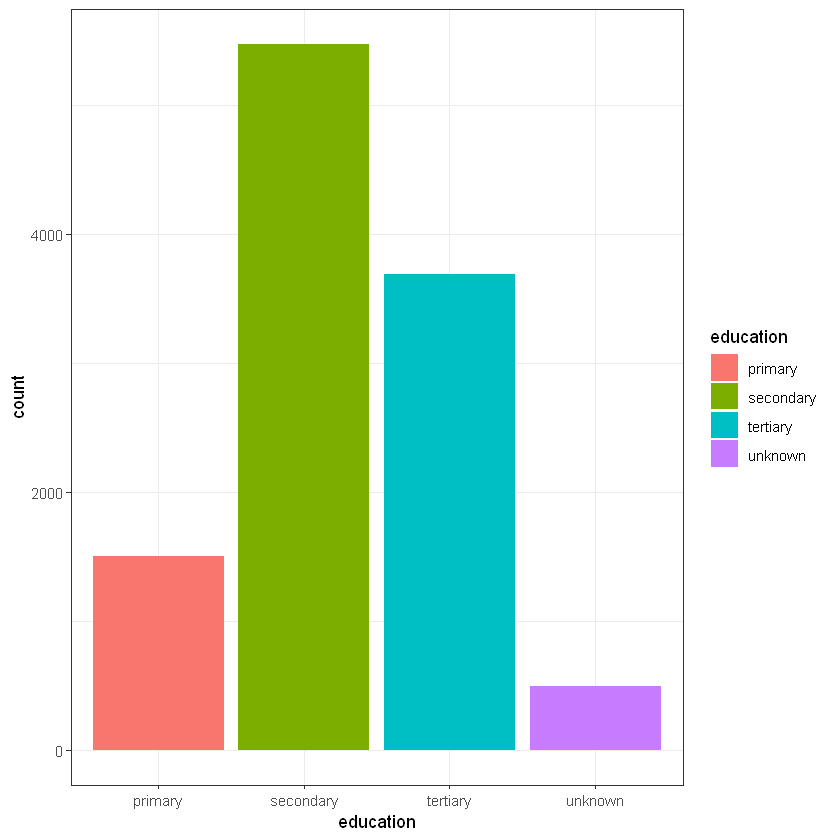

In [38]:
ggplot(data, aes(education)) + 
    geom_bar(aes(fill = education)) + 
    theme_bw()

In [41]:
CrossTable(data$education, data$deposit)
# people with tertiary education is more loyal than other groups


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
               | data$deposit 
data$education |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
       primary |       909 |       591 |      1500 | 
               |    18.172 |    20.179 |           | 
               |     0.606 |     0.394 |     0.134 | 
               |     0.155 |     0.112 |           | 
               |     0.081 |     0.053 |           | 
---------------|-----------|-----------|-----------|
     secondary |      3026 |      2450 |      5476 | 
               |     7.272 |     8.075 |           | 
               |     0.553 |     0.447 |     0.491 | 
               |     0.515 |     0.463 |           | 
               |     0.271 |     0.219 |           | 
----------

**Дефолт (default):**

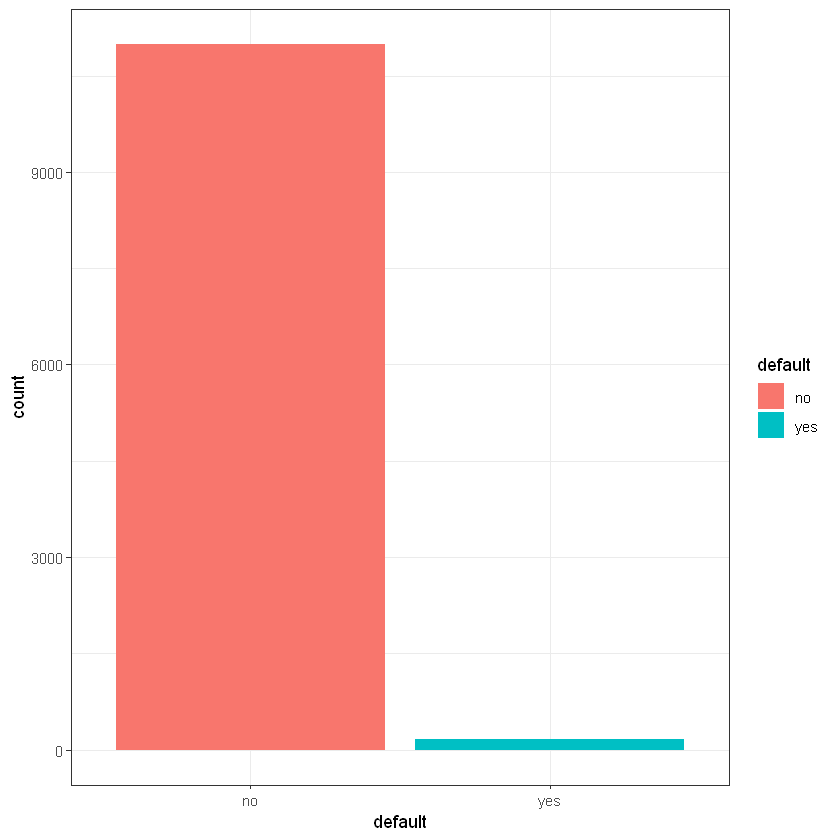

In [43]:
ggplot(data, aes(default)) + 
    geom_bar(aes(fill = default)) + 
    theme_bw()

In [46]:
CrossTable(data$default, data$deposit)
# defaults not very loyal to deposits, but why? ))))))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$default |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      5757 |      5237 |     10994 | 
             |     0.132 |     0.146 |           | 
             |     0.524 |     0.476 |     0.985 | 
             |     0.980 |     0.990 |           | 
             |     0.516 |     0.469 |           | 
-------------|-----------|-----------|-----------|
         yes |       116 |        52 |       168 | 
             |     8.621 |     9.573 |           | 
             |     0.690 |     0.310 |     0.015 | 
             |     0.020 |     0.010 |           | 
             |     0.010 |     0.005 |           | 
-------------|-----------|-----------|

**Баланс (balance):**

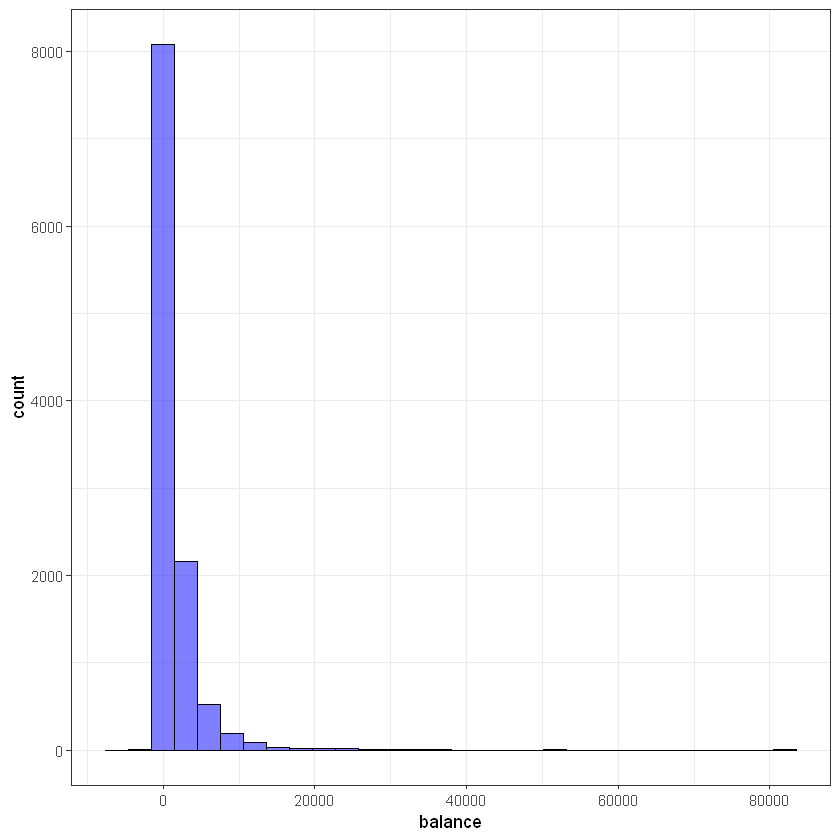

In [50]:
ggplot(data, aes(balance)) + 
    geom_histogram(bins = 30, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

# looks like balance data has outliers

**Наявність кредиту на житло (housing):**

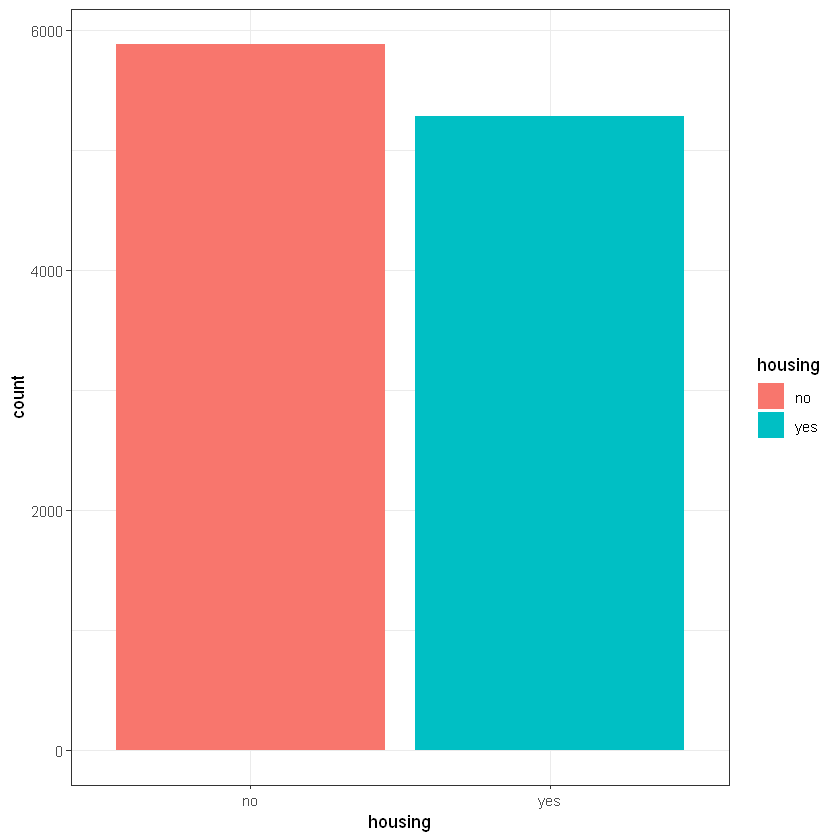

In [52]:
ggplot(data, aes(housing)) + 
    geom_bar(aes(fill = housing)) + 
    theme_bw()

In [55]:
CrossTable(data$housing, data$deposit)
# people without housing load logicaly more often can do deposits


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$housing |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      2527 |      3354 |      5881 | 
             |   104.023 |   115.509 |           | 
             |     0.430 |     0.570 |     0.527 | 
             |     0.430 |     0.634 |           | 
             |     0.226 |     0.300 |           | 
-------------|-----------|-----------|-----------|
         yes |      3346 |      1935 |      5281 | 
             |   115.842 |   128.633 |           | 
             |     0.634 |     0.366 |     0.473 | 
             |     0.570 |     0.366 |           | 
             |     0.300 |     0.173 |           | 
-------------|-----------|-----------|

**Наявність позики (loan):**

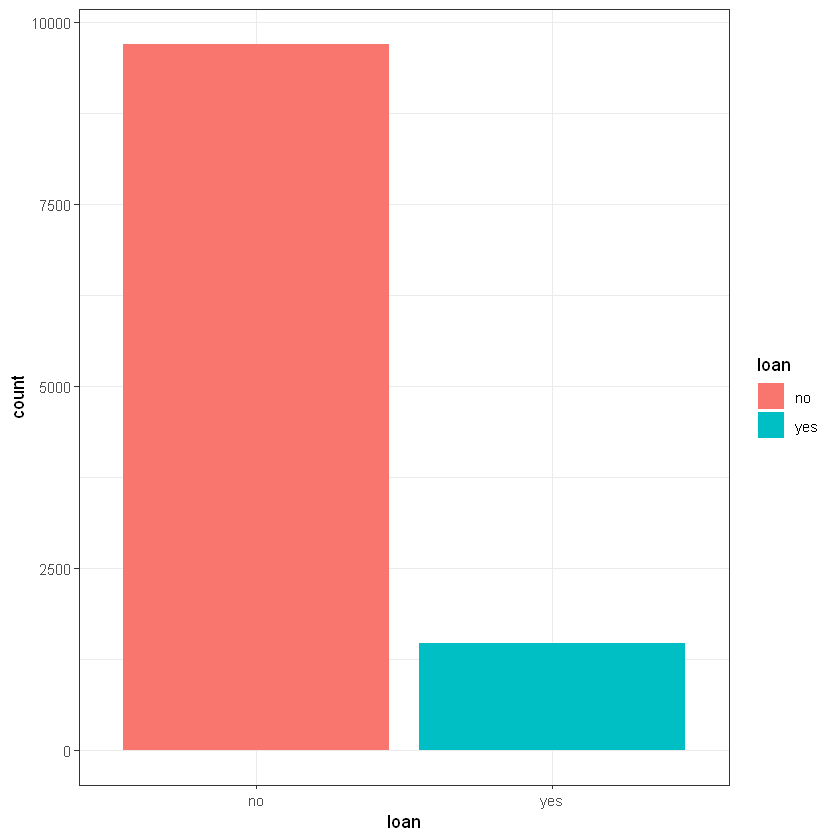

In [57]:
ggplot(data, aes(loan)) + 
    geom_bar(aes(fill = loan)) + 
    theme_bw()

In [59]:
CrossTable(data$loan, data$deposit)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
   data$loan |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      4897 |      4805 |      9702 | 
             |     8.459 |     9.393 |           | 
             |     0.505 |     0.495 |     0.869 | 
             |     0.834 |     0.908 |           | 
             |     0.439 |     0.430 |           | 
-------------|-----------|-----------|-----------|
         yes |       976 |       484 |      1460 | 
             |    56.214 |    62.421 |           | 
             |     0.668 |     0.332 |     0.131 | 
             |     0.166 |     0.092 |           | 
             |     0.087 |     0.043 |           | 
-------------|-----------|-----------|

**# Тип комунікації (contact):**

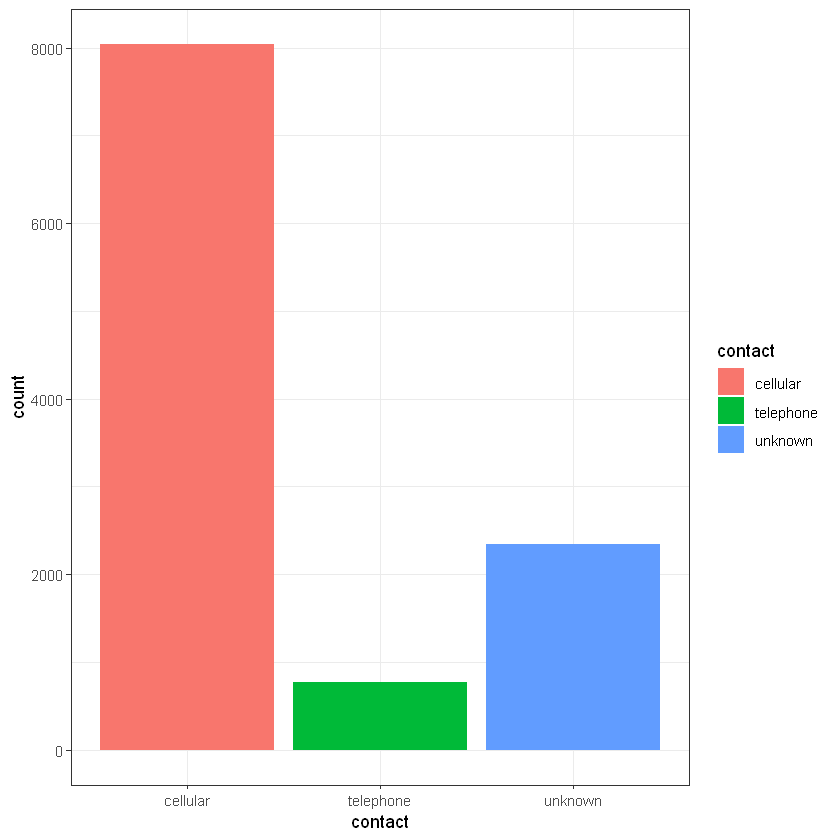

In [61]:
ggplot(data, aes(contact)) + 
    geom_bar(aes(fill = contact)) + 
    theme_bw()

In [64]:
CrossTable(data$contact, data$deposit)
# cellular communication channel looks like the best way to increase deposits count
# people with cellular devices has more money? 


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$contact |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
    cellular |      3673 |      4369 |      8042 | 
             |    73.685 |    81.821 |           | 
             |     0.457 |     0.543 |     0.720 | 
             |     0.625 |     0.826 |           | 
             |     0.329 |     0.391 |           | 
-------------|-----------|-----------|-----------|
   telephone |       384 |       390 |       774 | 
             |     1.327 |     1.474 |           | 
             |     0.496 |     0.504 |     0.069 | 
             |     0.065 |     0.074 |           | 
             |     0.034 |     0.035 |           | 
-------------|-----------|-----------|

**День місяця (day):**

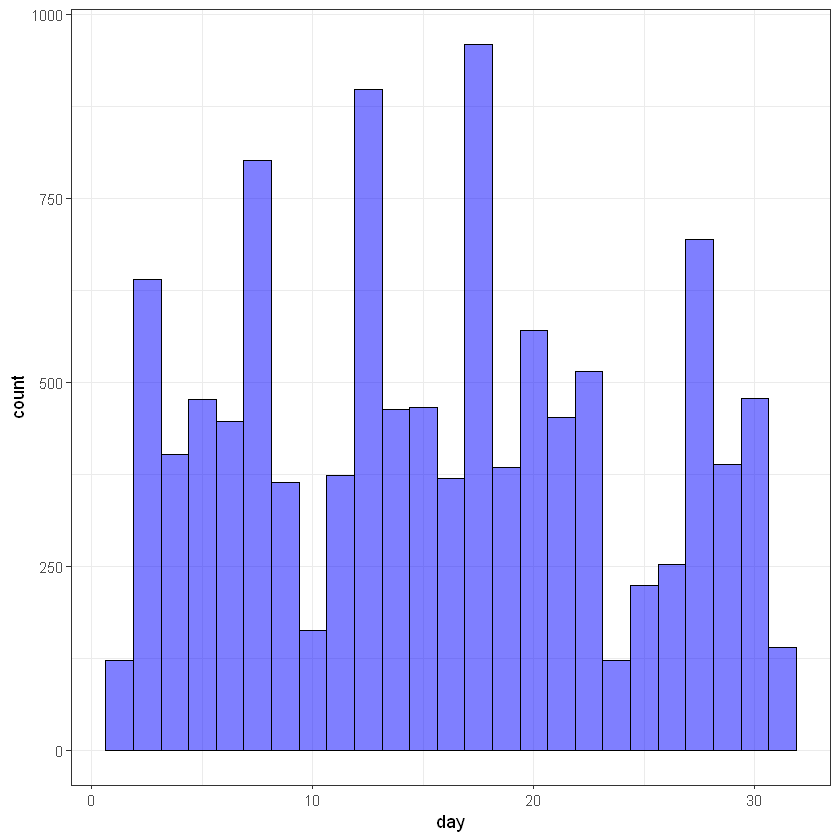

In [65]:
ggplot(data, aes(day)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()